## Req

In [1]:
import re
import unicodedata
import warnings

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import textstat

from matplotlib.ticker import PercentFormatter
from tqdm.notebook import tqdm

from textblob import TextBlob
from textblob_nl import PatternAnalyzer

warnings.filterwarnings("ignore")

# set language to dutch 
textstat.set_lang("nl")

# progress bar when apply functions to dataframe
tqdm.pandas()

# better quality plots
%config InlineBackend.figure_format = "retina"

# Title font size
TITLE_SIZE = 14


# (merged) Data inladen

In [21]:
import pandas as pd

# File paths
file1 = r'C:\Users\dylan\Thesis\GIT\Datasets\Open_Data_RDW__Gekentekende_voertuigen_20250311.csv'
file2 = r'C:\Users\dylan\Thesis\GIT\Datasets\Open_Data_RDW__Gekentekende_voertuigen_brandstof_20250310.csv'
output_file_usb = r'D:\merged_dataset_full.csv'

# Define column selections for each dataset
cols_file1 = ['Kenteken', 'Voertuigsoort', 'Merk', 'Datum eerste toelating']
cols_file2 = ['Kenteken', 'Brandstof omschrijving', 'CO2 uitstoot gecombineerd', 
              'Uitlaatemissieniveau', 'CO2 emissieklasse', 
              'Max vermogen 60 minuten', 'Netto max vermogen elektrisch']

# Step 1: Read the fuel dataset
df_brandstof = pd.read_csv(file2, usecols=cols_file2, dtype=str)

# Step 2: Read and process the vehicle dataset chunkwise
chunk_size = 1000000  # 1 million rows at a time
chunk_iterator = pd.read_csv(file1, usecols=cols_file1, dtype=str, chunksize=chunk_size)

# Collection of processed chunks
merged_chunks = []

for chunk in chunk_iterator:
    # Convert 'Datum eerste toelating' safely (Fixing 1970-01-01 issue)
    chunk['Datum eerste toelating'] = pd.to_datetime(chunk['Datum eerste toelating'], format='%Y%m%d', errors='coerce')

    # Debug: Check date conversion before merging
    print("Before merge:", chunk[['Kenteken', 'Datum eerste toelating']].dropna().head())

    # Merge datasets
    merged_chunk = chunk.merge(df_brandstof, on='Kenteken', how='left')

    # Debug: Check dates after merging
    print("After merge:", merged_chunk[['Kenteken', 'Datum eerste toelating']].dropna().head())

    # Append chunk to the list
    merged_chunks.append(merged_chunk)

# Combine all chunks
df_merged = pd.concat(merged_chunks, ignore_index=True)

# Save to a CSV file
df_merged.to_csv(output_file_usb, index=False)

print(f"The file has been saved to your USB stick: {output_file_usb}")


Before merge:   Kenteken Datum eerste toelating
0   TFX83D             2011-06-30
1   TFX83F             2002-06-30
2   TFX83G             2019-06-30
3   TFX83H             1956-06-30
4   TFX83J             1964-06-30
After merge:   Kenteken Datum eerste toelating
0   TFX83D             2011-06-30
1   TFX83F             2002-06-30
2   TFX83G             2019-06-30
3   TFX83H             1956-06-30
4   TFX83J             1964-06-30
Before merge:         Kenteken Datum eerste toelating
1000000   VFP42G             2020-03-13
1000001   VFP42J             2018-11-14
1000002   VFP42K             2020-02-27
1000003   VFP42N             2017-11-23
1000004   VFP42P             2020-03-20
After merge:   Kenteken Datum eerste toelating
0   VFP42G             2020-03-13
1   VFP42J             2018-11-14
2   VFP42K             2020-02-27
3   VFP42N             2017-11-23
4   VFP42P             2020-03-20
Before merge:         Kenteken Datum eerste toelating
2000000   WXPV40             2007-07-13


In [9]:
import pandas as pd

# File paths
file1 = r'C:\Users\dylan\Thesis\GIT\Datasets\Open_Data_RDW__Gekentekende_voertuigen_20250311.csv'
file2 = r'C:\Users\dylan\Thesis\GIT\Datasets\Open_Data_RDW__Gekentekende_voertuigen_brandstof_20250310.csv'
output_file_usb = r'D:\merged_dataset_full.csv'

# Choose the correct columns
cols_file1 = ['Kenteken', 'Voertuigsoort', 'Merk', 'Datum eerste toelating']
cols_file2 = ['Kenteken', 'Brandstof omschrijving', 'CO2 uitstoot gecombineerd', 
              'Uitlaatemissieniveau', 'CO2 emissieklasse', 
              'Max vermogen 60 minuten', 'Netto max vermogen elektrisch']

# Step 1: Read the fuel dataset
df_brandstof = pd.read_csv(file2, usecols=cols_file2, dtype=str)

# Step 2: Read and process the vehicle dataset chunkwise
chunk_size = 1000000  # 1 million rows at a time
chunk_iterator = pd.read_csv(file1, usecols=cols_file1, dtype=str, chunksize=chunk_size, parse_dates=['Datum eerste toelating'], dayfirst=True)

# Collection of processed chunks
merged_chunks = []

for chunk in chunk_iterator:
    # Optionally: Adjust date format if needed
    chunk['Datum eerste toelating'] = chunk['Datum eerste toelating'].astype(str)

    # Merge the current chunk with the fuel dataset
    merged_chunk = chunk.merge(df_brandstof, on='Kenteken', how='left')

    # Add to the list
    merged_chunks.append(merged_chunk)

# Combine all chunks
df_merged = pd.concat(merged_chunks, ignore_index=True)

# Save to a CSV file
df_merged.to_csv(output_file_usb, index=False)

print(f"The file has been saved to your USB stick: {output_file_usb}")

print(f"A single chunk processed and saved in: {output_file_usb}")



The file has been saved to your USB stick: D:\merged_dataset_full.csv
A single chunk processed and saved in: D:\merged_dataset_full.csv


In [12]:
from IPython.display import display

display(df_test.head())
display(df_test.info())




,index,Kenteken,Voertuigsoort,Merk,Datum eerste toelating,Brandstof omschrijving,CO2 uitstoot gecombineerd,Max vermogen 60 minuten,Netto max vermogen elektrisch,Uitlaatemissieniveau,CO2 emissieklasse,Jaar
0,1778393,WLZF01,Aanhangwagen,EIGENBOUW,1970-01-01,NaN,NaN,NaN,NaN,NaN,NaN,1970
1,1797675,WNBZ22,Aanhangwagen,EIGENBOUW,1970-01-01,NaN,NaN,NaN,NaN,NaN,NaN,1970
2,1805229,WNNN63,Aanhangwagen,EIGENBOUW,1970-01-01,NaN,NaN,NaN,NaN,NaN,NaN,1970
3,1838779,WPJV96,Aanhangwagen,ZELFBOUW,1970-01-01,NaN,NaN,NaN,NaN,NaN,NaN,1970
4,1844107,WPSL58,Aanhangwagen,EIGENBOUW,1970-01-01,NaN,NaN,NaN,NaN,NaN,NaN,1970


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   index                          159 non-null    int64         
 1   Kenteken                       159 non-null    object        
 2   Voertuigsoort                  159 non-null    object        
 3   Merk                           159 non-null    object        
 4   Datum eerste toelating         159 non-null    datetime64[ns]
 5   Brandstof omschrijving         149 non-null    object        
 6   CO2 uitstoot gecombineerd      0 non-null      object        
 7   Max vermogen 60 minuten        0 non-null      object        
 8   Netto max vermogen elektrisch  0 non-null      object        
 9   Uitlaatemissieniveau           11 non-null     object        
 10  CO2 emissieklasse              0 non-null      object        
 11  Jaar               

None

In [23]:
print(df_test[['Datum eerste toelating']].dropna().sort_values(by='Datum eerste toelating').head(20))
print(df_test['Datum eerste toelating'].describe())


    Datum eerste toelating
0               1970-01-01
101             1970-01-01
102             1970-01-01
103             1970-01-01
104             1970-01-01
105             1970-01-01
106             1970-01-01
107             1970-01-01
100             1970-01-01
108             1970-01-01
110             1970-01-01
111             1970-01-01
112             1970-01-01
113             1970-01-01
114             1970-01-01
115             1970-01-01
116             1970-01-01
109             1970-01-01
117             1970-01-01
99              1970-01-01
count                    159
mean     1970-01-01 00:00:00
min      1970-01-01 00:00:00
25%      1970-01-01 00:00:00
50%      1970-01-01 00:00:00
75%      1970-01-01 00:00:00
max      1970-01-01 00:00:00
Name: Datum eerste toelating, dtype: object


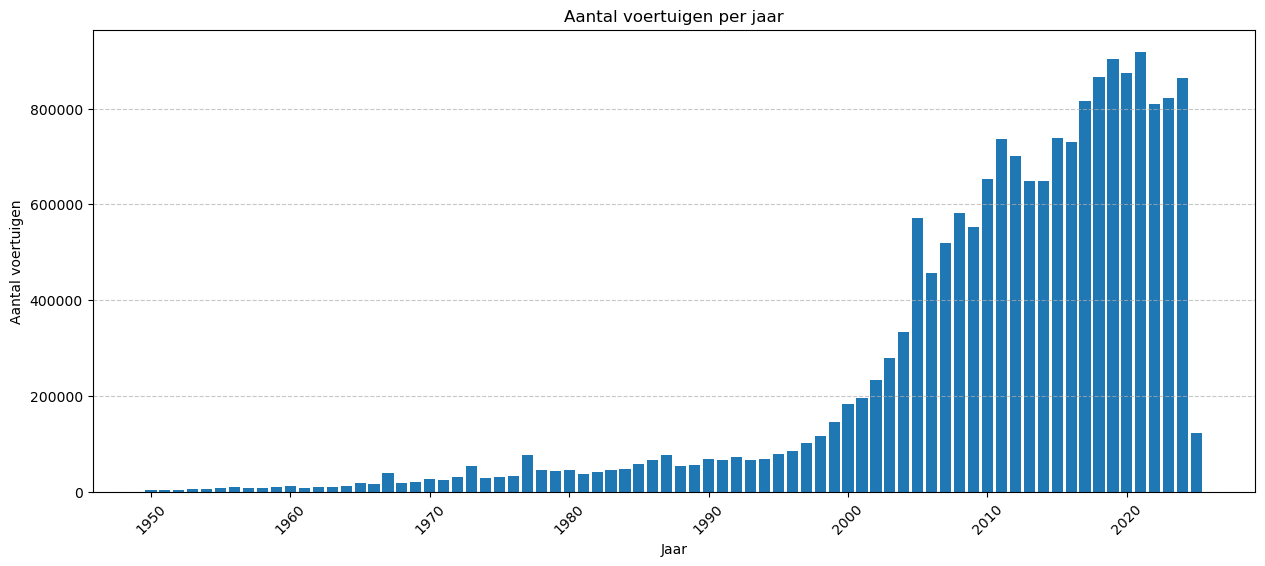

In [27]:



import matplotlib.pyplot as plt

# Count the number of vehicles per year
df_merged['Jaar'] = df_merged['Datum eerste toelating'].dt.year
vehicle_counts = df_merged.groupby('Jaar').size()

# Filter out unrealistic years (before 1950)
vehicle_counts = vehicle_counts[(vehicle_counts.index >= 1950) & (vehicle_counts.index <= 2025)]

# Plot the number of vehicles per year as a bar chart
plt.figure(figsize=(15, 6))
plt.bar(vehicle_counts.index, vehicle_counts.values)
plt.xlabel('Jaar')
plt.ylabel('Aantal voertuigen')
plt.title('Aantal voertuigen per jaar')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [6]:
df_test['Datum eerste toelating'] = pd.to_datetime(df_test['Datum eerste toelating'] / 1e3, unit='s', errors='coerce')


TypeError: cannot perform __truediv__ with this index type: DatetimeArray